<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#0-Preliminaries" data-toc-modified-id="0-Preliminaries-1">0 Preliminaries</a></span><ul class="toc-item"><li><span><a href="#0.0-Importing-Packages-and-Modules" data-toc-modified-id="0.0-Importing-Packages-and-Modules-1.1">0.0 Importing Packages and Modules</a></span></li><li><span><a href="#0.1-Importing-data" data-toc-modified-id="0.1-Importing-data-1.2">0.1 Importing data</a></span></li></ul></li><li><span><a href="#1-Feature-selection" data-toc-modified-id="1-Feature-selection-2">1 Feature selection</a></span><ul class="toc-item"><li><span><a href="#1.1-Pearson-Correlation" data-toc-modified-id="1.1-Pearson-Correlation-2.1">1.1 Pearson Correlation</a></span></li><li><span><a href="#1.2-Remove-useless-features" data-toc-modified-id="1.2-Remove-useless-features-2.2">1.2 Remove useless features</a></span></li></ul></li><li><span><a href="#2-Data-proprocessing" data-toc-modified-id="2-Data-proprocessing-3">2 Data proprocessing</a></span><ul class="toc-item"><li><span><a href="#2.0-Outliers-of-quantitative-data" data-toc-modified-id="2.0-Outliers-of-quantitative-data-3.1">2.0 Outliers of quantitative data</a></span></li><li><span><a href="#2.1-Split-of-the-train-and-test-sets" data-toc-modified-id="2.1-Split-of-the-train-and-test-sets-3.2">2.1 Split of the train and test sets</a></span></li><li><span><a href="#2.2-Encoding-categorical-and-scaling" data-toc-modified-id="2.2-Encoding-categorical-and-scaling-3.3">2.2 Encoding categorical and scaling</a></span></li></ul></li><li><span><a href="#3-Classification-model" data-toc-modified-id="3-Classification-model-4">3 Classification model</a></span><ul class="toc-item"><li><span><a href="#3.0-Visualization-of-the-data-(2D-projection)" data-toc-modified-id="3.0-Visualization-of-the-data-(2D-projection)-4.1">3.0 Visualization of the data (2D projection)</a></span></li><li><span><a href="#3.1-Dummy-Classifier-(Baseline)" data-toc-modified-id="3.1-Dummy-Classifier-(Baseline)-4.2">3.1 Dummy Classifier (Baseline)</a></span></li><li><span><a href="#3.2-Naive-Bayes-Classifier" data-toc-modified-id="3.2-Naive-Bayes-Classifier-4.3">3.2 Naive Bayes Classifier</a></span></li></ul></li></ul></div>

# "Implémentez un modèle de scoring"
_Building and optimizing a classification model_

References used for this notebook:

- ""

## 0 Preliminaries

### 0.0 Importing Packages and Modules

In [1]:
# from google.colab import files, output, drive
# drive.mount('/gdrive')
# %cd /gdrive

In [2]:
%pwd

'C:\\Users\\Maryse\\Documents\\o---FORMATION---o\\OCR_DS\\PROJET 7 - Mod Scoring\\PROJECT 7\\NOTEBOOKS'

Installations and importations required in the virtual environment.

In [3]:
# import os
# os.chdir('/gdrive/My Drive/--DATA SCIENCE/PROJET7/NOTEBOOKS')
# # !pip install -r requirements.txt

In [4]:
from P7_functions import *

Installations (creating the requirements file)

In [5]:
# !pip freeze > requirements_merging.txt

Importation of modules and packages. 

In [6]:
import io
import random
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'

Setting pandas display options.

In [7]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                  'display.max_colwidth': 100,
                  'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
  pd.set_option(k,v)

Additional functions

In [8]:
# To play audio text-to-speech during execution

from IPython.display import Audio
from gtts import gTTS

def speak(text, lang='en'):
    with io.BytesIO() as f:
        gTTS(text=text, lang=lang).write_to_fp(f)
        f.seek(0)
        return Audio(f.read(), autoplay=True)

### 0.1 Importing data

In [9]:
# import cleaned data

import dill as pickle

with open('..\DATA\PICKLES\dict_X_y_cleaned.pkl', 'rb') as file:
    dict_df = pickle.load(file)

In [10]:
# set SK_ID_CURR as the index (and thus exclude of the analysis)

X_train = dict_df['X']
y_train = dict_df['y']
# X_train = X_train.set_index('SK_ID_CURR')

In [11]:
X_train.shape, y_train.shape

((307511, 159), (307511,))

In [12]:
X_train.dtypes.value_counts()

float64    122
int64       25
object      12
dtype: int64

In [13]:
# get categorical and quantitative columns

cat_cols = list(X_train.select_dtypes(exclude=[np.number]).columns)
quant_cols = list(X_train.select_dtypes(include=[np.number]).columns)

## 1 Feature selection

### 1.1 Pearson Correlation

In [14]:
# compute Pearson correlation matrix

corr = X_train[quant_cols].corr()

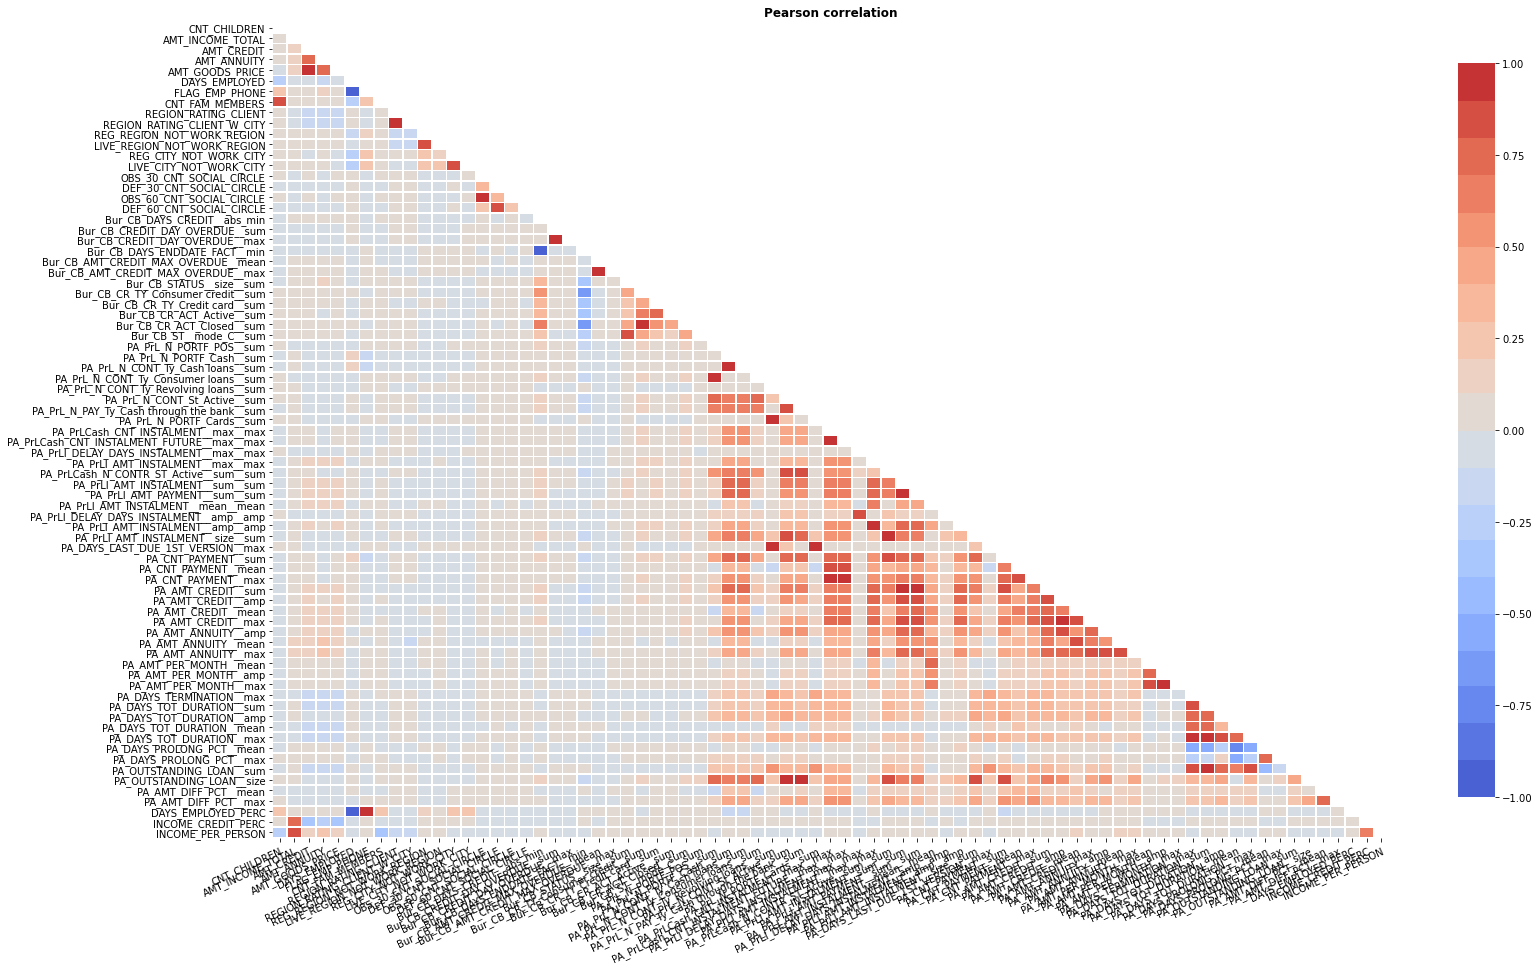

In [15]:
#### Select and vizualize high correlation features

cols_high_corr = corr[((np.abs(corr)>0.7)&(np.abs(corr)<1)).any(1)].index
corr_high_corr = X_train[cols_high_corr].corr()

plot_heatmap(corr_high_corr, 'Pearson correlation', shape='tri', annot=False, fmt='.2f',
             figsize=(25, 15), vmin=-1, vmax=1, center=0,
             palette=sns.color_palette("coolwarm", 20))

In [16]:
# # print columns with a high correlation
# for thresh in [0.7,0.8,0.9,0.99]:
#     li_corr_features = corr[((np.abs(corr)>thresh)&(np.abs(corr)<1)).any(1)].index
#     print('---threshold Pearson corr = '+str(thresh)+" ({})".format(str(len(li_corr_features))))
#     print(li_corr_features)

In [17]:
X_train.columns[X_train.columns.str.contains('REGION')] # 

Index(['REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION'],
      dtype='object')

### 1.2 Remove useless features

In [18]:
useless_cols = ['WEEKDAY_APPR_PROCESS_START', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_18', 'HOUR_APPR_PROCESS_START',
               'WEEKDAY_APPR_PROCESS_START', 'REGION_RATING_CLIENT'] 
colin_cols = ['DAYS_EMPLOYED', 'OBS_30_CNT_SOCIAL_CIRCLE']

quant_cols = [col for col in quant_cols if col not in colin_cols+useless_cols]
cat_cols = [col for col in cat_cols if col not in colin_cols+useless_cols]
X_train = X_train[quant_cols+cat_cols]

In [19]:
#### Feature selection based on colinearity (Variance Inflation Factor)
# Variance inflation factor (VIF) is the quotient of the variance in a model with multiple terms
# by the variance of a model with one term alone. It quantifies the severity of multicollinearity.
# Let's compute the values of VIF for our quantitative features:

# from statsmodels.stats.outliers_influence import variance_inflation_factor    

# variables = quant_cols
# var_inf = pd.Series([variance_inflation_factor(X_train.loc[:, variables].values, ix)\
#                for ix in range(X_train.loc[:, variables].shape[1])], index = variables).to_frame(name='var_inflation')

# display(var_inf.sort_values('var_inflation'))


# # Variance

# var_df = pd.Series(X_train_enc.var(axis=0),
#                    index=X_train_enc.columns).to_frame(name='variance')

# display(var_df.sort_values('variance'))

## 2 Data proprocessing

### 2.0 Outliers of quantitative data

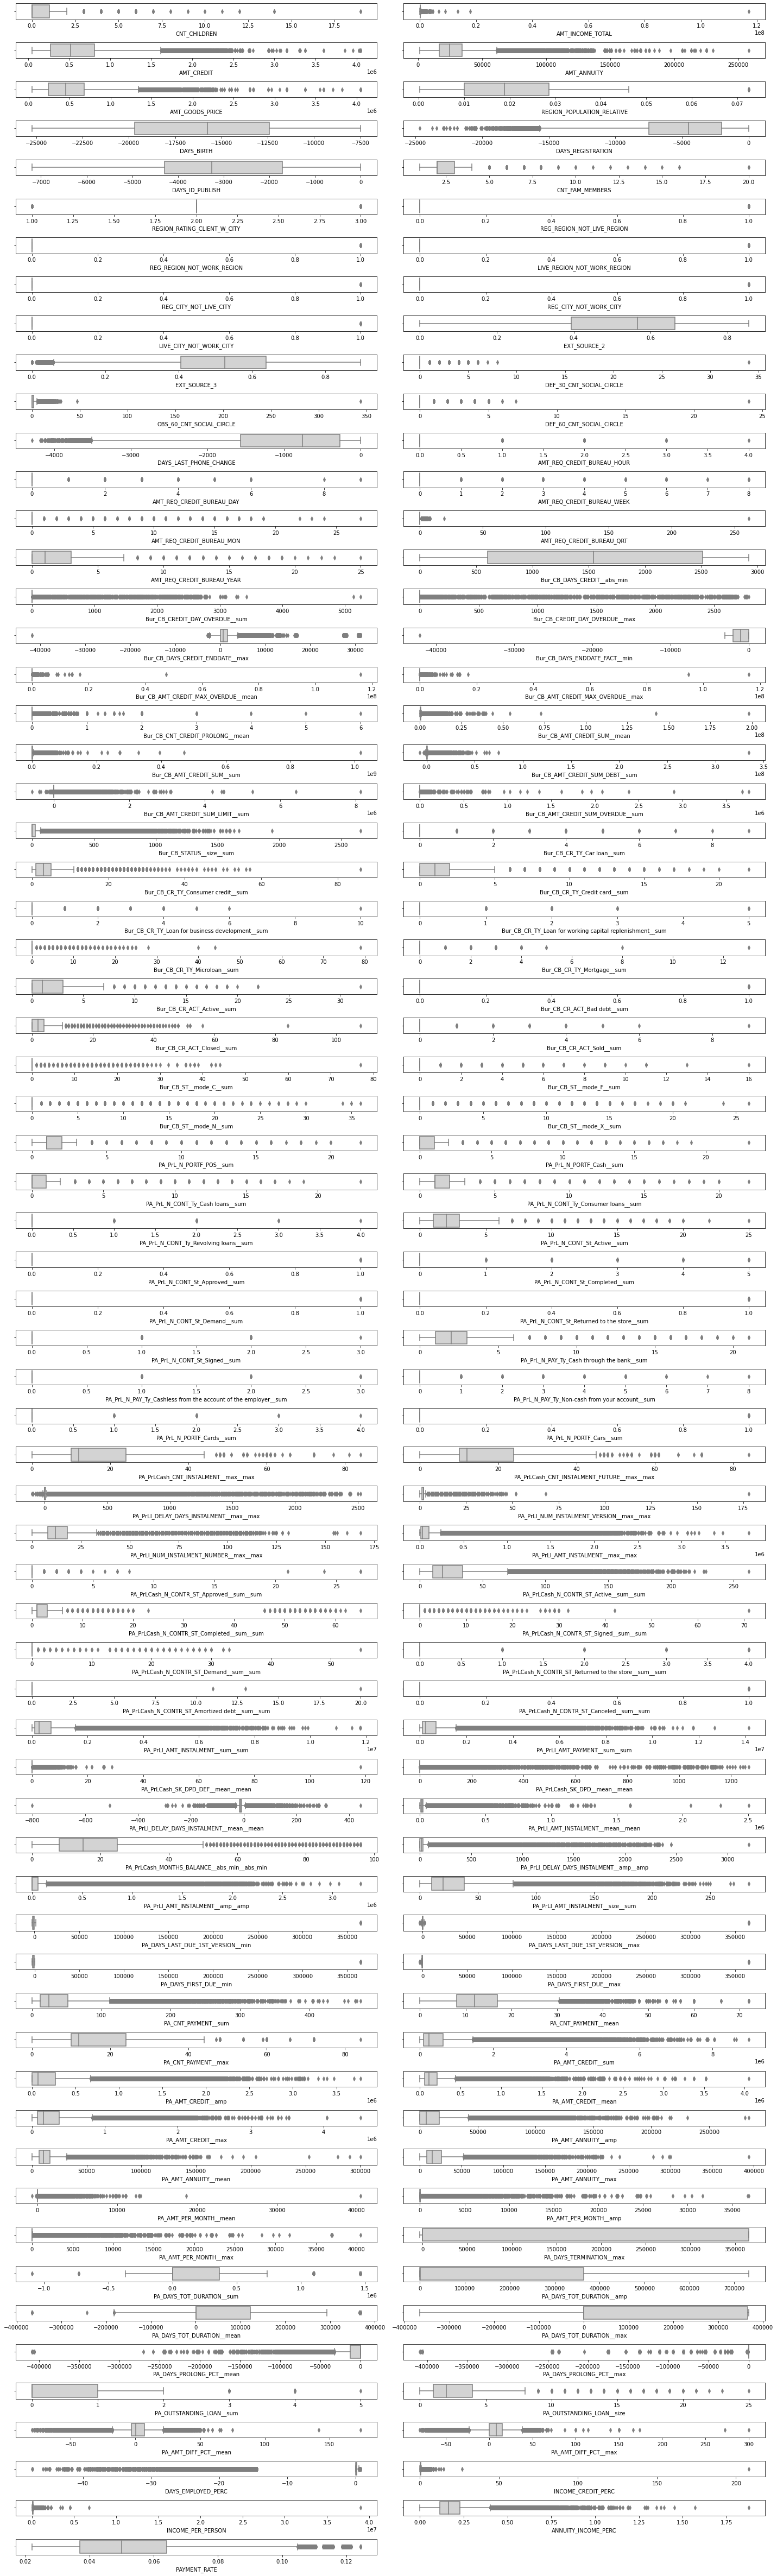

In [20]:
# Show outliers of each quantitative value

sel = quant_cols
width = 20
height = ((len(sel)+1)/2)*1

fig = plt.figure(figsize=(width, height))
for i, c in enumerate(sel,1):
    ax = fig.add_subplot((len(sel)+2)//2, 2, i)
    sns.boxplot(x=X_train[c], orient='h',
                color='lightgrey', ax=ax)
fig.tight_layout()

### 2.1 Split of the train and test sets

In [22]:
from sklearn.model_selection import train_test_split

# Splitting a training set and a test set
strat_col = 'NAME_INCOME_TYPE'
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train,
                                    train_size=0.7, shuffle=True,
                                    stratify=X_train[strat_col],
                                    random_state=14)

### 2.2 Encoding categorical and scaling

We perform the following treatment on the data:
- Standardscaler (quantitative values)
- Binary (ordinal encoding)
- Categorical - low card (one hot encoding)
- Categorical - high card (ordinal encoding)

In [23]:
X_train.shape

(307511, 142)

In [62]:
# custom transformer

import warnings
warnings.filterwarnings('ignore')

ct = CustTransformer(thresh_card=12,
                     strat_quant='stand',
                     strat_binary='ord',
                     strat_low_card='ohe',
                     strat_high_card='loo')

X_tr_enc = ct.fit_transform(X_tr, y_tr) # y_train is here for 'loo'

In [63]:
X_tr.shape, X_tr_enc.shape

((215257, 142), (215257, 167))

## 3 Classification model

### 3.0 Visualization of the data (2D projection)

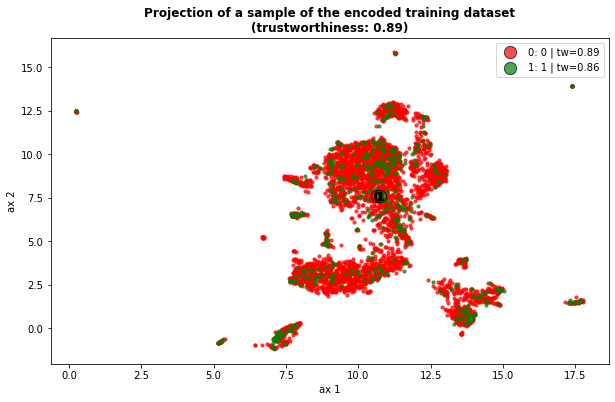

In [98]:
# Projection of a sample of the training set, colored with target value

ind_samp = X_tr_enc.sample(5000).index

plot_projection(X=X_tr_enc.loc[ind_samp], y=y_tr.loc[ind_samp],
                model=None, ser_clust = y_tr.loc[ind_samp], proj='UMAP', # dum_class # PCA, UMAP, t-SNE
                tw_n_neigh=5, title="Projection of a sample of the encoded training dataset",
                bboxtoanchor=None, figsize=(10, 6), size=10, palette=['r','g'], # 'tab10'
                legend_on=False, fig=None, ax=None, random_state=14)

In [110]:
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve, auc, roc_curve

### 3.1 Dummy Classifier (Baseline)

In [115]:
from sklearn.dummy import DummyClassifier

dum_class = DummyClassifier(strategy='most_frequent',
                            random_state=14)
dum_class.fit(X_tr_enc, y_tr)
y_pred = dum_class.predict(X_tr_enc)
dum_class.score(X_tr_enc, y_tr)
# pd.Series(dum_class.predict(X_tr_enc)).value_counts()
print("f1_score: ", f1_score(y_tr, y_pred))
print("recall_score: ", recall_score(y_tr, y_pred))
print("precision_score: ", precision_score(y_tr, y_pred))
# print("auc: ", auc())

f1_score:  0.0
recall_score:  0.0
precision_score:  0.0


### 3.2 Naive Bayes Classifier

In [116]:
from sklearn.naive_bayes import GaussianNB

gnb_class = GaussianNB()
gnb_class.fit(X_tr_enc, y_tr)
y_pred = gnb_class.predict(X_tr_enc)
print("f1_score: ", f1_score(y_tr, y_pred))
print("recall_score: ", recall_score(y_tr, y_pred))
print("precision_score: ", precision_score(y_tr, y_pred))

f1_score:  0.17604983239633648
recall_score:  0.19092054041676207
precision_score:  0.1633282726872031
